# Customer Churn Prediction

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [18]:
df=pd.read_csv(r"C:\Users\Ayush\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
462,0880-TKATG,Male,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,385.9,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
207,1285-OKIPP,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,79.90,79.9,Yes
6931,2371-KFUOG,Male,0,No,No,58,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),99.15,5720.95,No
4793,2284-VFLKH,Male,0,Yes,No,49,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),99.25,4920.8,No


In [19]:
df.drop(['customerID'],axis='columns',inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [28]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [30]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [31]:
df.iloc[456]

gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                     28
PhoneService                              Yes
MultipleLines                              No
InternetService                   Fiber optic
OnlineSecurity                             No
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             One year
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           92.9
TotalCharges                          2768.35
Churn                                      No
Name: 456, dtype: object

In [32]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [33]:
df.shape

(7043, 20)

In [34]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_26052\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_26052\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [35]:
df1.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [40]:
Cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
     'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for column in Cols:
    df1[column].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_26052\769957726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({'Yes':1,'No':0},inplace=True)


In [41]:
df2=pd.get_dummies(data=df1,columns=['Contract','InternetService','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1
7039,Female,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,Female,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [46]:
pd.to_numeric(df2.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [48]:
pd.to_numeric(df2.MonthlyCharges)

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [50]:
df2.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

In [52]:
from sklearn.preprocessing import MinMaxScaler
cols=['tenure','MonthlyCharges','TotalCharges']
df2[cols] = df2[cols].replace(' ', np.nan)
df2.dropna(subset=cols, inplace=True)
scaler = MinMaxScaler()
df2[cols] = scaler.fit_transform(df2[cols])

In [61]:
for columns in df2:
    print(columns)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
MonthlyCharges
TotalCharges
Churn
Contract_Month-to-month
Contract_One year
Contract_Two year
InternetService_DSL
InternetService_Fiber optic
InternetService_No
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [62]:
df2[df2.Churn=='yes'].tenure

Series([], Name: tenure, dtype: float64)

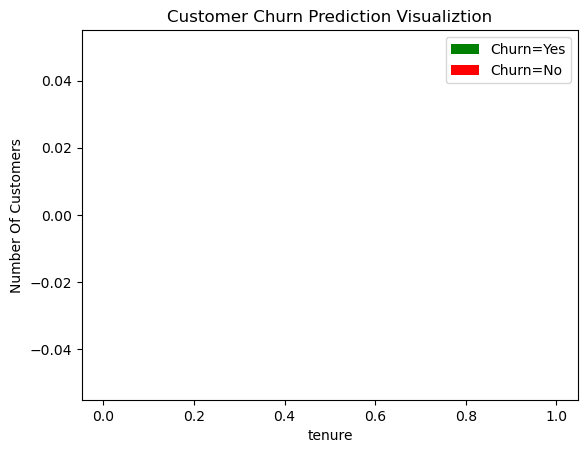

In [64]:
tenure_churn_no = df2[df2.Churn=='No'].tenure
tenure_churn_yes = df2[df2.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [67]:
df2['gender'].replace({'Male':1,'Female':0},inplace=True)

In [68]:
df2.tail(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
7042,1,0,0,0,0.915493,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0


In [72]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn

In [74]:
df2.shape

(7032, 27)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [77]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,activation='relu'),
    keras.layers.Dense(22,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 744us/step - loss: 0.5088 - accuracy: 0.7497
Epoch 2/100
176/176 [==============================] - 0s 731us/step - loss: 0.4305 - accuracy: 0.7938
Epoch 3/100
176/176 [==============================] - 0s 738us/step - loss: 0.4201 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 0s 734us/step - loss: 0.4154 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 734us/step - loss: 0.4117 - accuracy: 0.8025
Epoch 6/100
176/176 [==============================] - 0s 748us/step - loss: 0.4093 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 720us/step - loss: 0.4065 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 757us/step - loss: 0.4036 - accuracy: 0.8116
Epoch 9/100
176/176 [==============================] - 0s 722us/step - loss: 0.4015 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 709us/step - l

In [78]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 623us/step - loss: 0.5727 - accuracy: 0.7484


[0.5727382898330688, 0.748400866985321]

In [79]:
yp=model.predict(X_test)
yp[0:5]

44/44 [==============================] - 0s 558us/step


array([[0.10600661],
       [0.6820034 ],
       [0.00215378],
       [0.848671  ],
       [0.22930841]], dtype=float32)

In [80]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn, Length: 1407, dtype: int64

In [81]:
y_pred=[]
for element in yp:
    if element>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [83]:
y_pred[0:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [86]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       999
           1       0.58      0.48      0.53       408

    accuracy                           0.75      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.74      0.75      0.74      1407



Text(95.72222222222221, 0.5, 'truth')

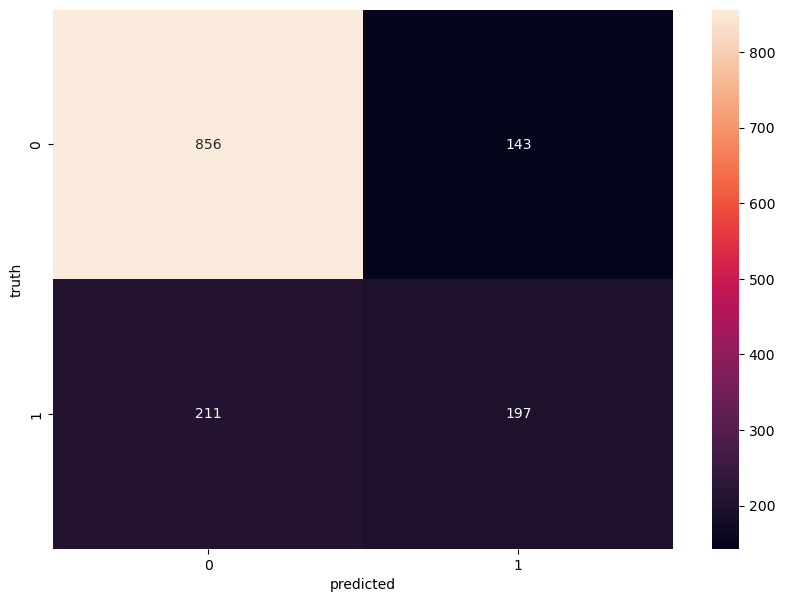

In [87]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

In [97]:
def ANN(X_train,X_test,y_train,y_test,loss,weights):
    model=keras.Sequential([ 
    keras.layers.Dense(26,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
        
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
    print(model.evaluate(X_test,y_test))   
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print("Classification_report: ",classification_report(y_test,y_pred))
    return y_pred

In [98]:
y_pred=ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.7643
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8014
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8039
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8078
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8091
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8100
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4028 - accura

In [116]:
class_count_0,class_count_1=df2.Churn.value_counts()
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [117]:
class_count_0,class_count_1

(5163, 1869)

In [118]:
df_class_0.shape

(5163, 27)

In [120]:
df_class_0.sample(class_count_1).shape

(1869, 27)

In [123]:
df_class_0_under=df_class_0.sample(class_count_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
print(df_test_under.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [124]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under.Churn

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [130]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [132]:
X_train.shape

(2990, 26)

In [134]:
y_train.shape

(2990,)

In [138]:
X_test.shape

(748, 26)

In [139]:
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 654us/step - loss: 0.6361 - accuracy: 0.6465
Epoch 2/100
94/94 [==============================] - 0s 691us/step - loss: 0.5334 - accuracy: 0.7462
Epoch 3/100
94/94 [==============================] - 0s 759us/step - loss: 0.5026 - accuracy: 0.7642
Epoch 4/100
94/94 [==============================] - 0s 752us/step - loss: 0.4902 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 0s 772us/step - loss: 0.4842 - accuracy: 0.7722
Epoch 6/100
94/94 [==============================] - 0s 722us/step - loss: 0.4795 - accuracy: 0.7746
Epoch 7/100
94/94 [==============================] - 0s 740us/step - loss: 0.4760 - accuracy: 0.7722
Epoch 8/100
94/94 [==============================] - 0s 683us/step - loss: 0.4730 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 714us/step - loss: 0.4716 - accuracy: 0.7749
Epoch 10/100
94/94 [==============================] - 0s 683us/step - loss: 0.4681 - accura

In [142]:
df_class_1_over=df_class_1.sample(class_count_0,replace=True)
df_test_over=pd.concat([df_class_1_over,df_class_0],axis=0)
print(df_test_over.Churn.value_counts())

1    5163
0    5163
Name: Churn, dtype: int64


In [143]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [144]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [145]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [147]:
y_preds = ANN(X_train,  X_test,y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 763us/step - loss: 0.5541 - accuracy: 0.7206
Epoch 2/100
259/259 [==============================] - 0s 685us/step - loss: 0.4935 - accuracy: 0.7592
Epoch 3/100
259/259 [==============================] - 0s 686us/step - loss: 0.4876 - accuracy: 0.7620
Epoch 4/100
259/259 [==============================] - 0s 783us/step - loss: 0.4823 - accuracy: 0.7678
Epoch 5/100
259/259 [==============================] - 0s 658us/step - loss: 0.4807 - accuracy: 0.7667
Epoch 6/100
259/259 [==============================] - 0s 699us/step - loss: 0.4786 - accuracy: 0.7684
Epoch 7/100
259/259 [==============================] - 0s 725us/step - loss: 0.4768 - accuracy: 0.7690
Epoch 8/100
259/259 [==============================] - 0s 749us/step - loss: 0.4750 - accuracy: 0.7724
Epoch 9/100
259/259 [==============================] - 0s 728us/step - loss: 0.4740 - accuracy: 0.7713
Epoch 10/100
259/259 [==============================] - 0s 713us/step - l

In [148]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [149]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [151]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [153]:
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 760us/step - loss: 0.5733 - accuracy: 0.7075
Epoch 2/100
259/259 [==============================] - 0s 690us/step - loss: 0.4965 - accuracy: 0.7615
Epoch 3/100
259/259 [==============================] - 0s 681us/step - loss: 0.4879 - accuracy: 0.7607
Epoch 4/100
259/259 [==============================] - 0s 669us/step - loss: 0.4828 - accuracy: 0.7659
Epoch 5/100
259/259 [==============================] - 0s 655us/step - loss: 0.4780 - accuracy: 0.7688
Epoch 6/100
259/259 [==============================] - 0s 669us/step - loss: 0.4770 - accuracy: 0.7695
Epoch 7/100
259/259 [==============================] - 0s 688us/step - loss: 0.4725 - accuracy: 0.7751
Epoch 8/100
259/259 [==============================] - 0s 666us/step - loss: 0.4689 - accuracy: 0.7751
Epoch 9/100
259/259 [==============================] - 0s 705us/step - loss: 0.4668 - accuracy: 0.7800
Epoch 10/100
259/259 [==============================] - 0s 679us/step - l

Therefore our model is train with high f1-score for minority equal to 0.81 and accuracy almost 80%.